In [108]:
import numpy as np 
from skimage import color, io
import matplotlib.pyplot as plt
import cv2
from scipy import signal
from numpy.fft import fft2, ifft2
import os
os.sys.path




['C:\\Users\\msi\\Desktop\\TPs\\restauration',
 'C:\\Users\\msi\\anaconda3\\python39.zip',
 'C:\\Users\\msi\\anaconda3\\DLLs',
 'C:\\Users\\msi\\anaconda3\\lib',
 'C:\\Users\\msi\\anaconda3',
 '',
 'C:\\Users\\msi\\anaconda3\\lib\\site-packages',
 'C:\\Users\\msi\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.9.egg',
 'C:\\Users\\msi\\anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\msi\\anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\msi\\anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\msi\\anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\msi\\.ipython']

(512, 512)


C:\Users\msi\AppData\Local\Temp/ipykernel_22036/4162088337.py:2: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = color.rgb2gray(img)
C:\Users\msi\AppData\Local\Temp/ipykernel_22036/4162088337.py:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  lune = color.rgb2gray(lune)
C:\Users\msi\AppData\Local\Temp/ipykernel_22036/4162088337.py:8: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D ar

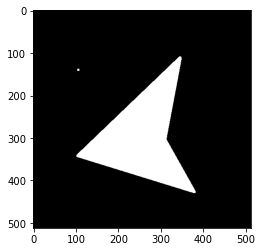

In [109]:
img = io.imread('./image1.tif')
img = color.rgb2gray(img)
print(img.shape)
plt.imshow(img,cmap="gray")
lune=io.imread('./lune.tif')
lune = color.rgb2gray(lune)
floue=io.imread('./floue.tif')
floue = color.rgb2gray(floue)

In [110]:
#salt and pepper bruit
import random
def SaltPe(img):
  x,y=img.shape
  npix= random.randint(100,100)
  for i in range(npix):
    y1=random.randint(0, y - 1)
    x1=random.randint(0, x - 1)
    img[x1][y1]=255

  for i in range(npix):
    y1=random.randint(0, y - 1)
    x1=random.randint(0, x - 1)
    img[x1][y1]=0
  return img 

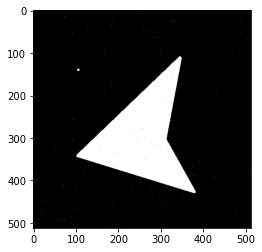

In [111]:
I = SaltPe(img)
plt.imshow(I,cmap="gray")

In [112]:
def  H_filtre(G,K):
    G1= G.z.conjugate()
    return (G1/(abs(G)**2 +K))

In [113]:
def gauss(size):
  F = np.zeros((size,size))
  X = [(i+1) - int((size + 1) / 2) for i in range(size)]
  et = size / 4 
  for i in X:
    for j in X:
      F[(i+int((1+size)/2)) - 1 ,(j+int((1+size)/2)) - 1 ] = np.exp(-(i*i+j*j)/(2*et*et))
  F=F/sum(sum(F))
  return(F)

In [114]:
bruit_gauss= gauss(20)
B1 = signal.convolve2d(lune, bruit_gauss, mode='same', boundary='fill')

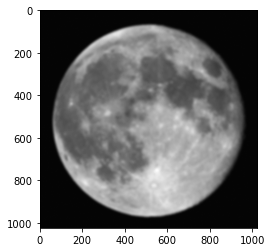

In [115]:
plt.imshow(lune,cmap="gray")


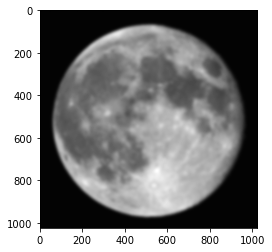

In [116]:
plt.imshow(B1,cmap="gray")

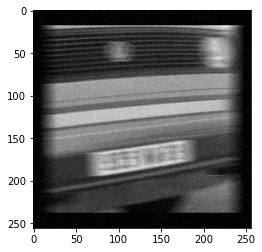

In [117]:
Tf_floue= np.fft.fft2(floue)
plt.imshow(floue,cmap="gray")

In [118]:
def bruit_mvt(x,y,d):
    if (y!=0):
        r=0
    else:
        r = np.where( x>=d & (x<=d) , 1/(2*d), 0)
    return r

In [138]:

X = np.arange(-128, 128)
bruit_mvtt=bruit_mvt(X,0,1)
print(bruit_mvtt.shape)


(256,)


In [139]:
tf_bruit_mvtt= np.fft.fft(bruit_mvtt)

In [171]:
def wiener_filter(img, kernel, K):
    kernel = kernel/ np.sum(kernel)
    dummy = np.copy(img)
    dummy = np.fft.fft2(dummy)
    kernel = np.fft.fft(kernel)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(np.fft.ifft2(dummy))
    return dummy

In [172]:
def gaussian_kernel(kernel_size = 3):
    h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h

In [173]:
filtered_img = wiener_filter(floue, tf_bruit_mvtt, K =1)

TypeError: Image data of dtype complex128 cannot be converted to float

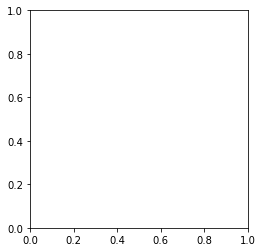

In [174]:
plt.imshow(filtered_img,cmap="gray")